# 1. 함수, 미적분Function, Calculus - 2/3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

sympy.init_printing()

## 미분

- 선형 회귀의 핵심

- 결정적 최적화에 기반한 알고리즘의 근간

- 딥러닝 또는 뉴럴네트워크의 역전파 알고리즘은 결국 미분을 위한 것

- 미분의 의미와 자주 등장하는 미분 형태를 중심으로 리뷰 

### 극한<sup>limits</sup>

- 함수에서 정의할 수 있는 함수값과는 다른 또 다른 값

- 함수 $f(x)$에서 $x$의 값이 $a$와 다른 값을 가지면서 $a$에 가까이 갈 때 $f(x)$의 값이 일정한 값 $L$에 가까워지면 

$$
\lim_{x \to a} f(x) = L
$$

- 이때 $L$을 $x \to a$일 때 함수 $f(x)$의 극한값 또는 극한이라 한다. 

- 특수한 경우 함수값과 극한값은 같고 이를 연속이라 함.

- 대부분 우리는 이런 경우를 일반적이라고 생각

- 하지만 일반적으로는 $\lim_{x \to a} f(x) \ne f(a)$

- 중요한 것은 $x$가 결코 $a$가 되지 않는다는 점, $x=a$가 된다면 그값은 함수값이 됨.

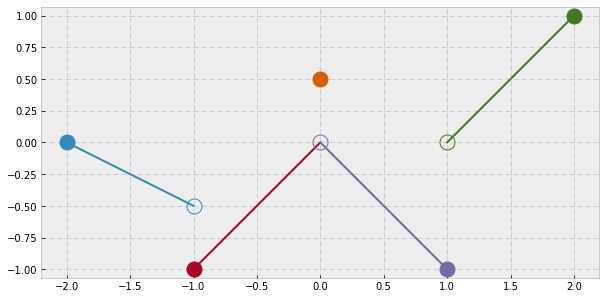

In [12]:
import matplotlib.lines as mlines

#print(mlines.Line2D.fillStyles)

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)

x1 = np.linspace(-2, -1, 10)
x2 = np.linspace(-1, 0, 10)
x3 = np.linspace(0, 1, 10)
x4 = np.linspace(1, 2, 10)

plt.plot(x1, -(0.5*x1+1), x2, x2, x3, -x3, x4, (x4-1))

plt.plot(-2, 0, 'o', color=style_colors[0], markersize=15,)
plt.plot(-1, -0.5, 'o', color=style_colors[0], markersize=15, fillstyle='none')

plt.plot(-1, -1, 'o', color=style_colors[1], markersize=15,)
plt.plot(0, 0, 'o',   color=style_colors[2], markersize=15, fillstyle='none')
plt.plot(1, -1, 'o',   color=style_colors[2], markersize=15, )

plt.plot(1, 0, 'o',   color=style_colors[3], markersize=15, fillstyle='none')
plt.plot(2, 1, 'o',   color=style_colors[3], markersize=15, )

plt.plot(0, 0.5, 'o',   color=style_colors[4], markersize=15, )

plt.axis('equal');

$$
\lim_{x \to -2+} f(x) = 0
$$

$$
\lim_{x \to -1-} f(x) = -0.5 \quad \ne \quad \lim_{x \to -1+} f(x) = -1
$$

$$
\lim_{x \to 0-} f(x) = 0 \quad = \quad  \lim_{x \to 0+} f(x) = 0 \quad\ne\quad f(0) = 0.5
$$

$$
\lim_{x \to 1-} f(x) = -1 \quad \ne \quad \lim_{x \to 1+} f(x) = 0 
$$

$$
\lim_{x \to 2-} f(x) = 1
$$

- 극한의 존재성 : $x \to a$일때 함수 $f(x)$가 $L$로 수렴하면 $x \to a+$ 일때 우극한과 $x \to a-$일때 좌극한이 모두 존재하고 그 값이 $L$로 같다. 또한 그역도 성립

- 위 경우 $\lim_{x \to -1}f(x)$, $\lim_{x \to 1}f(x)$은 존재하지 않음.

- 분수함수에서의 극한 

$$
f(x) = \frac{x^2 - 1}{x-1}
$$

- 위 함수에서 $x=1$근처에서 어떤일이 일어나는가?

$$
\lim_{x \to 1} \frac{x^2 - 1}{x-1} = 2 \ne f(1)
$$

- $f(1)$는 정의되지 않음

       f(x)         x
0  1.900000  0.900000
1  2.100000  1.100000
2  1.990000  0.990000
3  2.010000  1.010000
4  1.999000  0.999000
5  2.001000  1.001000
6  1.999999  0.999999
7  2.000001  1.000001


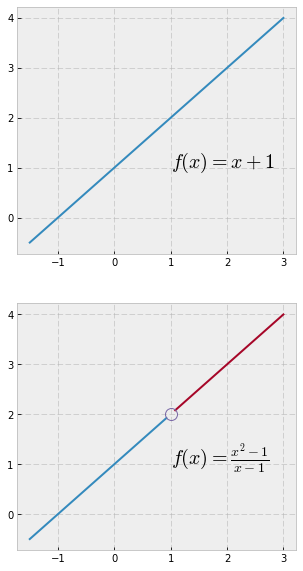

In [15]:
%matplotlib inline

import pandas as pd

plt.rcParams["figure.figsize"] = (5, 10)

x_left  = np.linspace(-1.5, 0.999999, 100)
x_right = np.linspace(1.000001, 3, 100)
x       = np.linspace(-1.5, 3, 100)

f_left  = (x_left[:-3]**2 - 1) / (x_left[:-3] -1)
f_right = (x_right[4:]**2 - 1) / (x_right[4:] -1)

f = x+1

fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.plot(x, f)
ax1.text(1, 1, r"$f(x) = x+1$", fontsize=20)

ax2 = fig.add_subplot(212)
ax2.plot(x_left[:-3], f_left, x_right[4:], f_right)
ax2.plot(1,2, 'o', markersize=12, fillstyle='none')
ax2.text(1, 1, r"$f(x) = \frac{x^2 - 1}{x-1}$", fontsize=20)

x_near = np.array([0.9, 1.1, 0.99, 1.01, 0.999, 1.001, 0.999999, 1.000001])
f_near = (x_near**2 - 1) / (x_near -1)
near = pd.DataFrame({'x':x_near, 'f(x)':f_near})
print(near)

In [45]:
x = sympy.Symbol('x')

sympy.limit((x**2-1)/(x-1), x, 1)

- 삼각함수의 극한을 다루지 않지만 극한의 개념을 이해하기에 좋은 예제로 소개

$$
\lim_{x \to 0} \frac{\sin(x)}{x} = 1
$$

- $x = 0$에서 함수값이 정의되지 않지만 분자와 분모의 비가 어떻게 될까?

- $x$가 결코 0이 되지 않는다면 분자와 분모의 비를 계속 계산해 볼 수 있을 것이다!

- 엑셀로도 확인 가능

/home/metamath/lang/python/py3/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


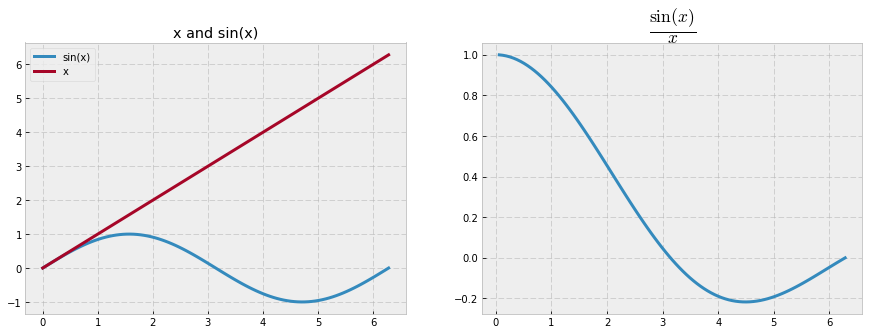

In [4]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)

x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.plot(x, np.sin(x), lw=3, label="sin(x)")
ax1.plot(x, x, lw=3, label="x")
ax1.axis('tight')
ax1.set_title(r"x and sin(x)")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(x, np.sin(x)/x, lw=3)
ax2.set_title(r"$\frac{\sin(x)}{x}$", fontsize=25);

# np.set_printoptions(precision=3, suppress=True)
# print((np.sin(x[1:]) / x[1:]).reshape(3,-1).T)

### 미분<sup>differentiation</sup>

#### 평균변화율 

- $x$의 증분 $\Delta x$에 대한 $y$의 증분 $\Delta y$의 비율

$$
\frac{\Delta y}{\Delta x} = \frac{f(b)-f(a)}{b-a} = \frac{f(a+\Delta x)-f(a)}{\Delta x}
$$

- 두 점사이의 곡선의 형태는 평균변화율에 영향을 미치지 않음.

- 좀 더 자세한 정보를 위해 두 점사이의 간격을 좁힐 필요가 있음.

#### 미분계수(순간변화율)The Derivative at a Point

-  평균변화율의 분모를 순간에 이를 정도로 작게 만들어

$$
f'(a) = \frac{df(a)}{dx} = \color{RoyalBlue}{\lim_{\Delta x \to 0} \frac{f(a+\Delta x)-f(a)}{\Delta x}} = \color{OrangeRed}{ \lim_{x \to a} \frac{f(x)-f(a)}{x-a}}
$$

- 극한이 존재하면 즉 $\Delta x$가 결코 0이 되지 않기 때문에 수렴한다면 이 극한값을 순간변화율 또는 미분계수라 함

- **순간변화율은 그 위치에서 접선의 기울기로 해석 가능**

#### 도함수The Derivative as a Function

- 미분계수를 함수값으로 가지는 함수, 미분 가능한 함수 $y=f(x)$의 도함수는

$$
f'(x) = \frac{df(x)}{dx} = \lim_{\Delta x \to 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}
$$

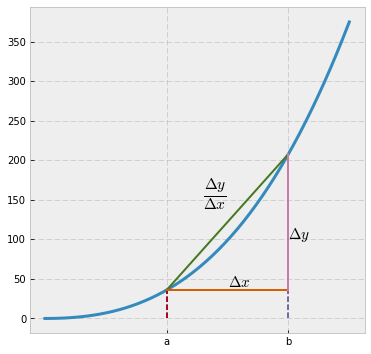

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)

x = np.linspace(0,5)

def f(x):
    return 2*x**3 + 5*x**2

a , b = 2,4 

plt.plot(x, f(x), lw=3)
plt.plot( (a,a), (0, f(a)), '--', lw=2 )
plt.plot( (b,b), (0, f(b)), '--', lw=2 )
plt.plot( (a,b), (f(a), f(b)), lw=2) #평균변화율
plt.plot( (a,b), (f(a), f(a)), lw=2) #dx
plt.plot( (b,b), (f(a), f(b)), lw=2) #dy

plt.text(3, 40, r'$\Delta x$', color='black', fontdict={ 'size': 15, })
plt.text(4, 100, r'$\Delta y$', color='black', fontdict={ 'size': 15, })
plt.text(2.6, 150, r'$\frac{\Delta y}{\Delta x}$', color='black', fontdict={ 'size': 22, })
plt.xticks( [a, b], ['a', 'b'] );


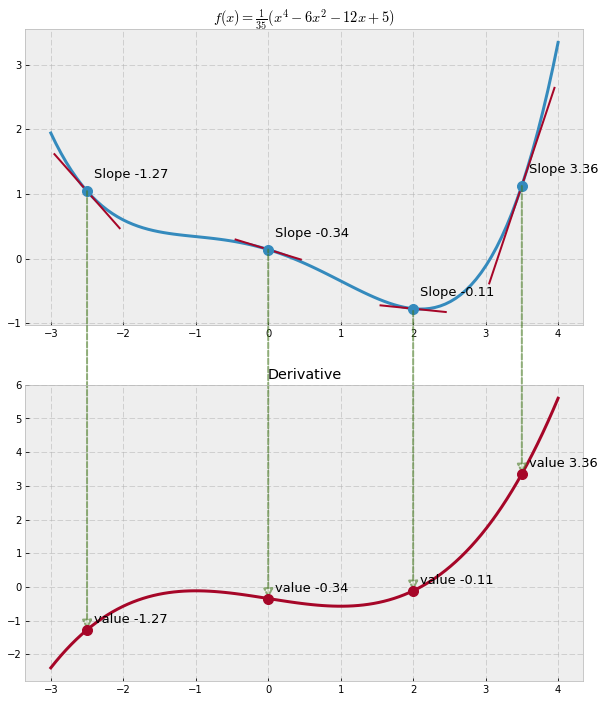

In [101]:
%matplotlib inline
from matplotlib.patches import ConnectionPatch

plt.rcParams["figure.figsize"] = (10,12)

def f(x) :
    return  (x**4 - 6*x**2 -12*x +5)/35.

def fdot(x):
    return (4*x**3 -12*x -12)/35.

def draw_slope(pts, itv, ax1, ax2) :
    eps = 1.0e-5
    for x in pts :
        ax1.plot(x, f(x), 'o', markersize=10, color=style_colors[0], zorder=3)
        ax2.plot(x, fdot(x), 'o', markersize=10, color=style_colors[1], zorder=3)
        
        con = ConnectionPatch(xyA=(x, fdot(x)), xyB=(x, f(x)), ls='--', coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color=style_colors[3], lw=2, alpha=0.6,
                      arrowstyle="<|-", mutation_scale=20, fc="w", zorder=2)
        ax2.add_artist(con)
        
        #numerical deriv.
        diff = (f(x+eps) - f(x))/eps
        ax1.plot([x-itv, x+itv], [f(x)-diff*itv, f(x)+diff*itv], lw=2, color=style_colors[1])
        ax1.text(x + 0.1 ,f(x)+0.2, "Slope {:.2f}".format(diff), fontsize=13)
        ax2.text(x + 0.1 ,fdot(x)+0.2, "value {:.2f}".format(fdot(x)), fontsize=13)

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

x = np.linspace(-3, 4, 100)
slope_points = [-2.5, 0,  2, 3.5] 

ax1.plot(x, f(x), color=style_colors[0], lw=3)
ax1.set_title(r"$f(x)=\frac{1}{35}(x^4 - 6x^2 -12x + 5)$")

ax2.plot(x, fdot(x), color=style_colors[1], lw=3)
ax2.set_title(r"Derivative")

draw_slope(slope_points, 0.45, ax1, ax2)

#### 용어

- differentiation $\ne$ derivative

> "The process of calculating a derivative is called differentiation."

> "If $f'$ exists at a particular $x$, we say that $f$ is differentiable (has a derivative) at $x$. If $f'$ exists at every point in the domain of $f$, we call $f$ differentiable."

#### 기호<sup>[7]</sup>

- $y = f(x)$일 때

    - **Leibniz's notation** : $\dfrac{dy}{dx} = \dfrac{df}{dx} = \dfrac{d}{dx}f(x)$

    - **Lagrange's notation** : $f'(x)$, $ y' $
    
    - **Newton's notation** : $\dot{y}$, $\ddot{y}$ 
    
    - **Euler's notation** :  $ D_{x}y$,$ D_{x}f(x)$, $D^{2}_{x}y$

### 다항 함수의 미분

- 공식 

$$
f(x) = x^n , \qquad \frac{d (f(x))}{dx} = n x ^{n-1}
$$

$$
\begin{align}
\frac{df(x)}{dx} 
&= \lim_{h \to 0} \frac{f(x+h)-f(x)}{h} = \lim_{h \to 0} \frac{(x+h)^n -  x^n}{h} \\[5pt]
&= \lim_{h \to 0} \frac{\{(x+h) - x\}\{(x+h)^{n-1} + (x+h)^{n-2} x + \cdots + (x+h) x^{n-2} + x^{n-1}\}}{h} \\
& \because (a - b)^n = (a-b)(a^{n-1} + a^{n-2}b + a^{n-3}b^2 + \cdots +a^2b^{n-3}+ ab^{n-2} + b^{n-1}) \\[5pt]
&= \lim_{h \to 0} \{(x+h)^{n-1} + (x+h)^{n-2} x + \cdots + (x+h) x^{n-2} + x^{n-1}\} \\[5pt]
&= \underbrace{(x)^{n-1} + (x)^{n-1} + \cdots + (x)^{n-1}}_{n} \\[5pt]
&= n x^{n-1}
\end{align}
$$

- 간단한 예

$$
\begin{align}
& y = x^2 \\[5pt]
& \lim_{h \to 0} \frac{(x+h)^2 - x^2}{h} = \lim_{h \to 0} \frac{x^2 + 2hx + h^2 - x^2}{h} = \lim_{h \to 0} \frac{h(2x +h)}{h} = 2x \\[5pt]
& \frac{dy}{dx} = 2x^{2-1} = 2x
\end{align}
$$

### 지수 함수의 미분

$$
\frac{d (e^x)}{dx}= e^x
$$

$$
\frac{d (a^x)}{dx} = a^x \ln a \qquad a>0, a \ne 1
$$

### 로그 함수의 미분

$$
\frac{d(\ln x)}{dx} = \frac{1}{x} \qquad x >0
$$

$$
\frac{d(\log_a x)}{dx} = \frac{1}{x \ln a} \qquad x >0, a>0, a \ne 1
$$

#### 지수, 로그 함수 미분 예제

- 도함수의 정의대로 미분을 구하고, 공식으로 구하기

- $y = e^{2x}$ 

$$
\begin{align}
\frac{dy}{dx} &= \lim_{h \to 0} \frac{e^{2(x+h)} - e^{2x}}{h} = \lim_{h \to 0} \frac{e^{2x}e^{2h} - e^{2x}}{h} \\[5pt]
&= \lim_{h \to 0} \frac{e^{2x}(e^{2h} - 1)}{h} = e^{2x} \lim_{h \to 0} \frac{(e^{2h} - 1)}{h} = e^{2x} \cdot 2 \lim_{h \to 0} \frac{(e^{2h} - 1)}{2h} = 2e^{2x}
\end{align}
$$

$$
u = 2x, y = e^u \qquad \frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx} = e^u \cdot 2 =2e^{2x}
$$

In [38]:
x = sympy.Symbol('x')

sympy.diff(sympy.E**(2*x), x)

- $y=\ln(x+1)$

$$
\begin{align}
\frac{dy}{dx} &= \lim_{h \to 0} \frac{\ln(x+1+h) - \ln(x+1)}{h} = \lim_{h \to 0} \frac{\ln\left( \frac{x+1+h}{x+1} \right)}{h} \\[5pt] 
&= \lim_{h \to 0} \frac{\ln \left(1+ \frac{h}{x+1} \right)}{h} = \lim_{h \to 0}\ln \left(1+ \frac{h}{x+1} \right)^{\frac{1}{h}} \\[5pt]
&=  \lim_{h \to 0}\ln \left[ \left(1+ \frac{h}{x+1} \right)^{\frac{x+1}{h}} \right]^\frac{1}{x+1} \\[5pt]
&= \frac{1}{x+1} \lim_{h \to 0}\ln  \left(1+ \frac{h}{x+1} \right)^{\frac{x+1}{h}} = \frac{1}{x+1} \ln  e = \frac{1}{x+1}
\end{align}
$$

$$
u = x+1, y = \ln(u) \qquad \frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx} = \frac{1}{u} \cdot 1 = \frac{1}{x+1}
$$

In [44]:
x = sympy.Symbol('x')

sympy.diff(sympy.log(x+1), x)

### 몇가지 미분법(참고)

- #### 상수 미분

$$
\frac{d c}{dx}  = 0
$$

- #### 곱의 미분
$$
y = f(x)g(x), \qquad \frac{dy}{dx} = f'(x)g(x) + f(x)g'(x)
$$

- $y = (3x^2 + x)(x^2 - x)$

$$
\begin{align}
\frac{dy}{dx} &= (3x^2 + x)'(x^2 - x) + (3x^2 + x)(x^2 - x)' \\[5pt]
&= (6x+1)(x^2 -x) + (3x^2 + x)(2x-1) \\[5pt]
&= 12x^3 - 6x^2 - 2 x
\end{align}
$$

- #### 분수함수 미분
$$
y = \frac{f(x)}{g(x)}, \qquad \frac{dy}{dx} =  \frac{f'(x)g(x) - f(x)g'(x)}{\{g(x)\}^2}
$$

- $y = \dfrac{x^2}{x+3} $

$$
\begin{align}
\frac{dy}{dx} &= \frac{(x^2)'(x+3)- x^2 (x+3)'}{(x+3)^2} \\[5pt]
&= \frac{2x(x+3) -x^2 \cdot 1}{(x+3)^2} = \frac{x^2+6x}{(x+3)^2}
\end{align}
$$

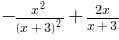

In [16]:
x = sympy.Symbol('x')

sympy.diff(x**2 / (x+3), x)

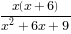

In [17]:
x = sympy.Symbol('x')

sympy.simplify(sympy.diff(x**2 / (x+3), x))

- #### 합성함수 미분

두 함수 $y=f(u)$, $u=g(x)$가 미분 가능할 때, 합성함수 $y = f(g(x))$의 $x$에 대한 미분

$$
\frac{d\,y(u)}{dx} =  \frac{d\,y(u)}{du} \frac{d\,u(x)}{dx} 
$$

합성함수 단원에 나왔던 예제

<img src="01-function/gf.png"/>

$f(x)=2x$, $g(x)=x^2 +1$ 일 때 $g \circ f(x)$의 $x$에 대한 미분

$y=f(x)=2x$로 쓰면 $g(y)= g \circ f(x)= y^2+1$ 

$$
\frac{d g(y)}{d x} = \color{RoyalBlue}{\frac{d g(y)}{d y}} \color{OrangeRed}{ \frac{d y} {d x}} = \color{RoyalBlue}{ 2y} \cdot \color{OrangeRed}{2} = 4y = 8x
$$

In [42]:
x = sympy.Symbol('x')

sympy.diff((2*x)**2 + 1, x)

### 다변수 미분 - 편미분<sup>[8]</sup>

- 2변수 이상 함수에서 하나의 변수에 대해서만 미분하는 것

- 함수 $f(x,y)$에 대한 $(x_0, y_0)$에서의 $x$에 대한 편도함수의 함수값(편미분)을 다음의 극한값으로 정의

$$
\frac{\partial f}{\partial x}(x_0, y_0) = \lim_{h \to 0} \frac{f(x_0 + h, y_0)-f(x_0, y_0)}{h}
$$

- 함수 $f(x,y)$에 대한 $(x_0, y_0)$에서의 $y$에 대한 편도함수의 함수값(편미분)을 다음의 극한값으로 정의

$$
\frac{\partial f}{\partial x}(x_0, y_0) = \lim_{h \to 0} \frac{f(x_0 , y_0+ h)-f(x_0, y_0)}{h}
$$

<table><tr><td>
<img src="01-function/partial.png" width="600">
</td></tr>
<tr><td><span class="fig-title">https://en.wikipedia.org/wiki/Partial_derivative#/media/File:Partial_func_eg.svg  CC BY-SA 4.0</span></td></tr>
</table>

- 편미분의 간단한 예 (4,-2)에서 $f(x,y) = x^2 + 3xy + y -3 $ 에 대해 $\partial f / \partial x$, $\partial f / \partial y$의 값을 구하라.

$$
\frac{\partial f}{\partial x } = \frac{\partial}{\partial x} (x^2 + 3xy + y - 3) = 2x + 3y = 2
$$

$$
\frac{\partial f}{\partial y } = \frac{\partial}{\partial y} (x^2 + 3xy + y - 3) = 3x + 1 = 13
$$

- 결과와 그래프를 함께 보면서 상황을 이해


In [6]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')

sympy.diff(x**2 + 3*x*y + y -3, x)

In [5]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')

sympy.diff(x**2 + 3*x*y + y -3, y)

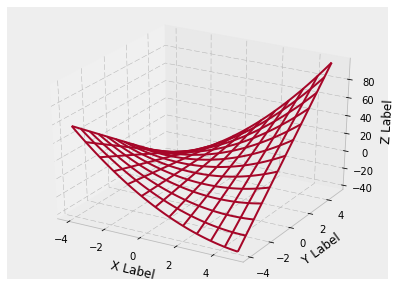

In [18]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (15,5)

x = y = np.arange(-4.0, 5.0, 0.05)
X, Y = np.meshgrid(x, y)

Z = X**2 + 3*X*Y + Y -3

fig = plt.figure()

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(X, Y, Z,rstride=15, cstride=15, color=style_colors[1])
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label');

- 위 그래프에서 $y$를 고정하고 $x$를 변화시키면 이동 경로는 아래로 볼록한 포물선 모양이 되는데 포물선의 모양이 $y$값 어디를 고정했느냐에 따라 다르고 $x$의 위치에 따라 미분계수(접선의 기울기)가 다름 $\to$ $x$에 대한 편미분은 $f(x,y)$

- 반면 $x$를 고정하고 $y$를 변화시키는 경우는 $x$값 어디를 고정했느냐에 따라서 직선의 모양이 달라지나 그 직선은 $y$값에 따라서 미분계수가 변하지 않음 $\to$ $y$에 대한 편미분은 $f(x)$

### 미분의 연쇄법칙<sup>[8]</sup>

- **역전파 알고리즘을 이해하는 핵심 사항**

- 일변수의 경우 합성함수 미분에서 본 것이 미분의 연쇄법칙, $x=g(t)$일 때 $w=f(x)$의 $t$에 대한 미분

$$
\frac{dw}{dt} = \frac{dw}{dx} \frac{dx}{dt} 
$$


<img src="01-function/chain1.png" width="250"/>

- 다변수 함수에 대해서도 동일한 규칙이 적용되며 다음과 같다. $y=f(t)$, $x=g(t)$일 때 $w=f(x,y)$의 $t$에 대한 편미분

$$
\frac{dw}{dt} =  \frac{\partial w}{\partial x}\frac{dx}{dt} + \frac{\partial w}{\partial y}\frac{dy}{dt}
$$

<img src="01-function/chain2.png" width="400"/>

- 3변수 일때 $z=f_1(t)$, $y=f_2(t)$, $x=f_3(t)$일 때 $w=f(x,y,z)$의 $t$에 대한 편미분

$$
\frac{dw}{dt} =  \frac{\partial w}{\partial x}\frac{dx}{dt} + \frac{\partial w}{\partial y}\frac{dy}{dt} + \frac{\partial w}{\partial z}\frac{dz}{dt}
$$

<img src="01-function/chain3.png" width="400"/>


### 함수의 극대, 극소

#### 함수의 최대, 최소<sup>global minimum, global maximum</sup>

>정의역 $D$에서 함수 $f$가 있을 때, 
- $D$의 점 $c$가 $D$의 모든 $x$에 대해서 $f(x) \le f(c)$이면 $f$는 최댓값<sup>absolute maximum</sup> $f(c)$를 가진다.
- $D$의 점 $c$가 $D$의 모든 $x$에 대해서 $f(x) \ge f(c)$이면 $f$는 최솟값<sup>absolute minimum</sup> $f(c)$를 가진다.


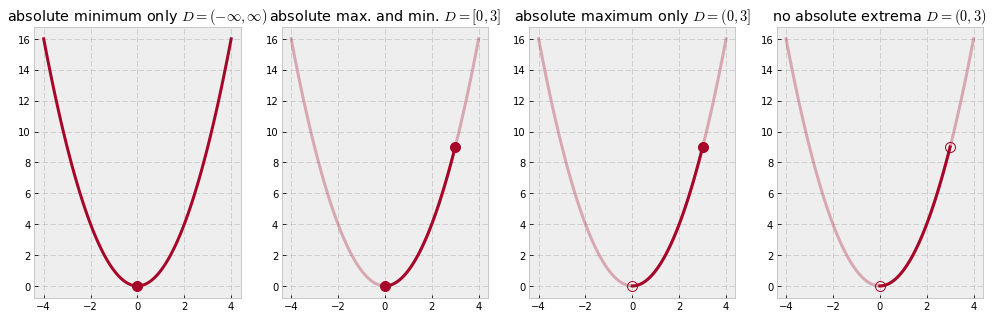

In [4]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (17,5)

x = np.linspace(-4, 4, 100)
x2 = np.linspace(0, 3, 100)
y = x**2
y2 = x2**2

fig = plt.figure()

ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.plot(x, y, lw=3, color=style_colors[1])
ax1.plot(0, 0, 'o',   color=style_colors[1], markersize=10)
ax1.set_title(r'absolute minimum only $D=(-\infty, \infty)$')

ax2.plot(x, y, lw=3, color=style_colors[1], alpha=0.3)
ax2.plot(x2, y2, lw=3, color=style_colors[1])
ax2.plot(0, 0, 'o',   color=style_colors[1], markersize=10)
ax2.plot(3, 9, 'o',   color=style_colors[1], markersize=10)
ax2.set_title(r'absolute max. and min. $D=[0,3]$')

ax3.plot(x, y, lw=3, color=style_colors[1], alpha=0.3)
ax3.plot(x2, y2, lw=3, color=style_colors[1])
ax3.plot(0, 0, 'o',   color=style_colors[1], markersize=10, fillstyle='none')
ax3.plot(3, 9, 'o',   color=style_colors[1], markersize=10)
ax3.set_title(r'absolute maximum only $D=(0,3]$')

ax4.plot(x, y, lw=3, color=style_colors[1], alpha=0.3)
ax4.plot(x2, y2, lw=3, color=style_colors[1])
ax4.plot(0, 0, 'o',   color=style_colors[1], markersize=10, fillstyle='none')
ax4.plot(3, 9, 'o',   color=style_colors[1], markersize=10, fillstyle='none')
ax4.set_title(r'no absolute extrema $D=(0,3)$');

|함수  | 도메인 $D$ | 최대 최소 |
|------|------|
|   (a) $y=x^2$  | $(-\infty, \infty)$ |최대값 없음<br/>$x = 0$에서 최소값 0 |
|   (b) $y=x^2$  | $[0,3]$ | $x = 3$에서 최대값 9<br/>$x = 0$에서 최소값 0 |
|   (c) $y=x^2$  | $(0,3]$ |$x = 3$에서 최대값 9<br/> 최소값 없음|
|   (d) $y=x^2$  | $(0,3)$ |최대, 최소 없음 |

#### 함수의 극대, 극소<sup>local minimum, local maximum</sup>

> -  $f$는 $x=c$에서 극댓값을 가진다. 만약 $c$를 포함하는 어떤 열린 구간에서 함수 $f$의 도메인 $D$에 있는 모든 $x$에 대해 $f(x) \le f(c)$이면 
- $f$는 $x=c$에서 극솟값을 가진다. 만약 $c$를 포함하는 어떤 열린 구간에서 함수 $f$의 도메인 $D$에 있는 모든 $x$에 대해 $f(x) \ge f(c)$이면  
- 극댓값과 극솟값을 통틀어 극값<sup>local extrema</sup>라 한다.


<img src="01-function/minmax2.png" width="700">


#### 극값과 미분계수the First Derivative theorem for Local extreme values

> 미분가능한 함수 $f(x)$가 $x=c$에서 극값을 가지고, $c$에서  $f'$가 정의되면 $f'(c)=0$

- 함수 $f(x)$가 $x=c$에서 극댓값을 가진다면 $f(c+h) \le f(c)$이므로

$$
 h < 0 \implies 0 \color{RoyalBlue}{\le}  \frac{f(c+h)-f(c)}{h}  , \quad h > 0 \implies \frac{f(c+h)-f(c)}{h} \color{OrangeRed}{\le} 0 
$$

- $f'(c)$가 정의된다 했으므로

$$
0 \color{RoyalBlue}{\le} \underbrace{ \lim_{h \to 0-} \frac{f(c+h)-f(c)}{h} = \lim_{h \to 0+} \frac{f(c+h)-f(c)}{h} }_{f'(c)} \color{OrangeRed}{\le} 0 \\[5pt]
\therefore f'(c) = 0
$$

- 예제 : $[1, 4]$에서 $f(x)=-(x-2)^2 + 10$의 최솟값과 최댓값은?

$$
f'(x) = -2(x-2)
$$

- 미분이 0이 되는 지점

$$
f'(2) = 0
$$

- 미분이 0이 되는 지점과 경계의 양끝점에서 함수값

$$
f(1) = 9, \quad f(2)=10, \quad f(4) = 6
$$




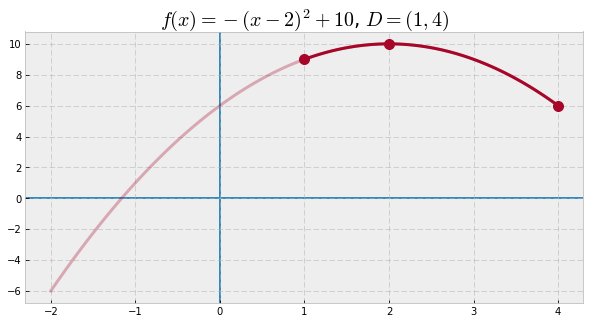

In [28]:
plt.rcParams["figure.figsize"] = (10,5)

x = np.linspace(-2, 4, 100)
x2 = np.linspace(1, 4, 100)
y = -(x-2)**2 + 10
y2 =-(x2-2)**2 + 10

plt.plot(x, y, color=style_colors[1], lw=3, alpha=0.3)
plt.plot(x2, y2, color=style_colors[1], lw=3)
plt.plot(2, 10, 'o',   color=style_colors[1], markersize=10)
plt.plot(1, 9, 'o',   color=style_colors[1], markersize=10)
plt.plot(4, 6, 'o',   color=style_colors[1], markersize=10)

plt.axvline(zorder=-1)
plt.axhline(zorder=-1)

plt.title(r'$f(x)=-(x-2)^2 + 10$, $D = (1,4)$', fontsize=20);

## 참고문헌

1. Scalars and Vectors, http://www.physicsclassroom.com/class/1DKin/Lesson-1/Scalars-and-Vectors

2. https://ko.wikipedia.org/wiki/함수

3. 벡터 미적분학, 곽도영,서동엽,임진환,진교택, 경문사

4. https://ko.wikipedia.org/wiki/음함수와_양함수

5. Surface Modeling for CAD/CAM - Advanced in Industrial Engineering, Byoung K. Choi, Elsevier

6. Unit normal vector of a surface, https://www.khanacademy.org/math/multivariable-calculus/integrating-multivariable-functions/flux-in-3d-articles/a/unit-normal-vector-of-a-surface

7. Derivative#Notation_(details): https://en.wikipedia.org/wiki/Derivative

8. Thomas' Calculus, Giordano, Weir, Finney, Pearson

9. Riemann 합의 3D 시각화, https://www.wolfram.com/mathematica/new-in-8/new-and-improved-scientific-and-information-visualization/visualize-3d-riemann-sums.html

10. Jacobian matrix and determinant, https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant

11. 벡터, 행렬에 대한 미분Derivatives for vectors and matrices, https://metamath1.github.io/2018/01/02/matrix-derivatives.html

12. 행렬식의 기하학적 의미 , https://wikidocs.net/4049

13. Finite Elements vol.1 An Introduction, Eric B. Becker, Graham F. Carey, J. Tinsley Oden, Prentice-Hall

14. The Jacobian matrix, Khan Academy, https://youtu.be/bohL918kXQk?t=1m15s


In [2]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/nanummyeongjo.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/nanumgothiccoding.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    table { font-family: 'Noto Sans KR' !important;  font-size: 13pt !important; }     
    p  { font-family: 'Georgia','Nanum Myeongjo'; /*font-size: 12pt;*/ line-height: 200%;  text-indent: 10px; }
    li { font-family: 'Georgia','Nanum Myeongjo'; /*font-size: 12pt;*/ line-height: 200%; }
    li > p { text-indent: 0px; }
    /* blockquote > p { font-family: 'Georgia','Nanum Myeongjo' !important; font-size: 12pt !important; } */
    sup { font-family: 'Georgia'; } 
    code, pre { font-family: 'Nanum Gothic Coding' !important; }
    .code-body { font-family: 'Nanum Gothic Coding'; }
    .ns { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .fig-title { font-family: 'Noto Sans KR'; font-size: 10pt;}
    .summary {font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
              border-left:3px solid #FF0000;padding-left:20px;margin-top:10px; }
</style>